In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as const

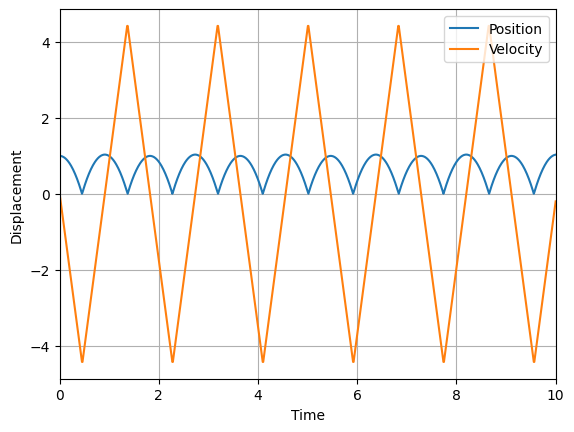

In [12]:
N = 1000
t = np.linspace(0,10,N) 
dt = t[1]-t[0]

x0 = 1
v0 = 0

def force(x):
     return -const.g * np.sign(x)

def leapfrog(x0, v0, dt, N):
    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = x0
    v[0] = v0

    for i in range (N-1):
       
         v[i+1] = v[i] + 0.5 * dt * force(x[i])
         x[i+1] = x[i] + dt * v[i+1]
         v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1])

    return x,v

x, v = leapfrog(x0, v0, dt, N)

plt.figure()
plt.plot(t, np.abs(x), label = 'Position')
plt.plot(t, v, label = 'Velocity')
plt.xlim(0, 10)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()

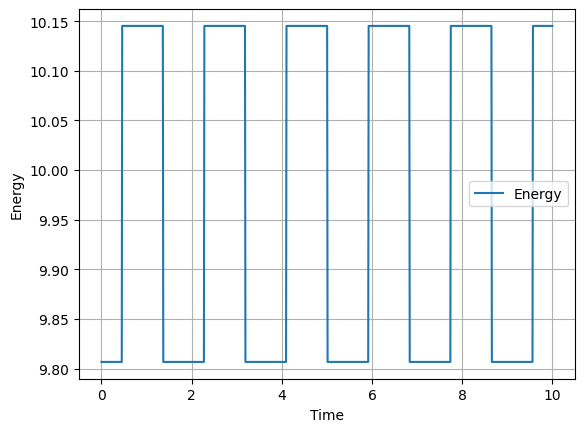

In [13]:
H = 0.5 * v **2 + const.g * np.abs(x)

plt.figure()
plt.plot(t, H, label = 'Energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend()
plt.grid()
plt.show()

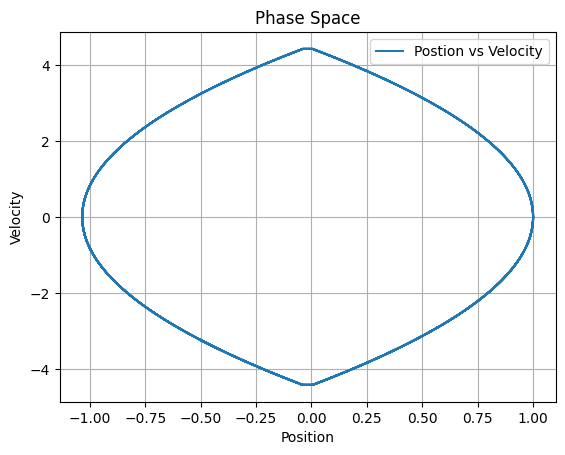

In [14]:
plt.figure()
plt.plot(x, v, label = 'Postion vs Velocity')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Phase Space')
plt.legend()
plt.grid()
plt.show()

## New Force

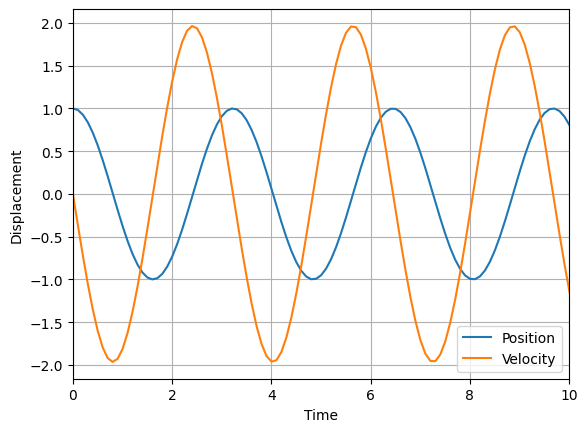

In [15]:
N = 1000
t = np.linspace(0,100,N) 
dt = t[1]-t[0]

x0 = 1
v0 = 0
x_s = 1.5

def force(x, x_s):
    return -const.g * 2/np.pi * np.arctan(x/x_s)

def leapfrog(x0, v0, x_s, dt, N):
    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = x0
    v[0] = v0

    for i in range (N-1):
       
         v[i+1] = v[i] + 0.5 * dt * force(x[i],x_s)
         x[i+1] = x[i] + dt * v[i+1]
         v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1],x_s)

    return x,v

x, v = leapfrog(x0, v0, x_s, dt, N)

plt.figure()
plt.plot(t, x, label = 'Position')
plt.plot(t, v, label = 'Velocity')
plt.xlim(0, 10)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()

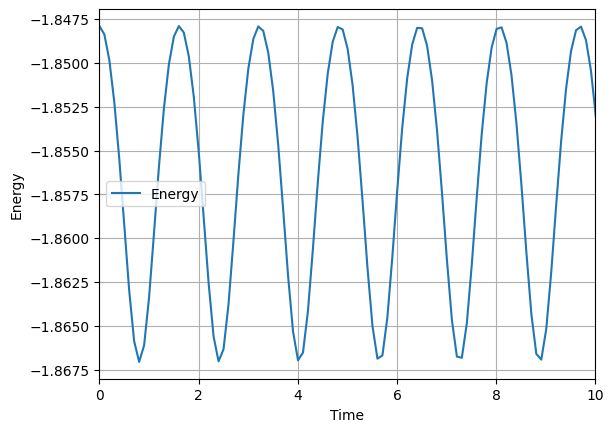

In [16]:
H = 0.5 * v**2 + -const.g/np.pi * (np.log(x**2 + x_s**2) * x_s - 2 * x * np.arctan(x/x_s))

plt.figure()
plt.plot(t, H, label = 'Energy')
plt.xlabel('Time')
plt.xlim(0, 10)
plt.ylabel('Energy')
plt.legend()
plt.grid()
plt.show()

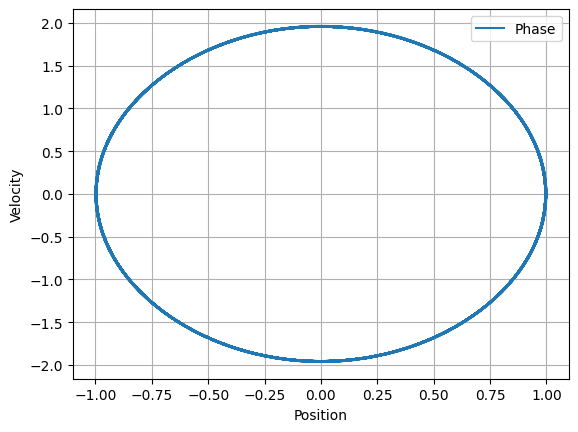

In [17]:
plt.figure()
plt.plot(x, v, label = 'Phase')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.legend()
plt.grid()
plt.show()

# Solutions Comparison

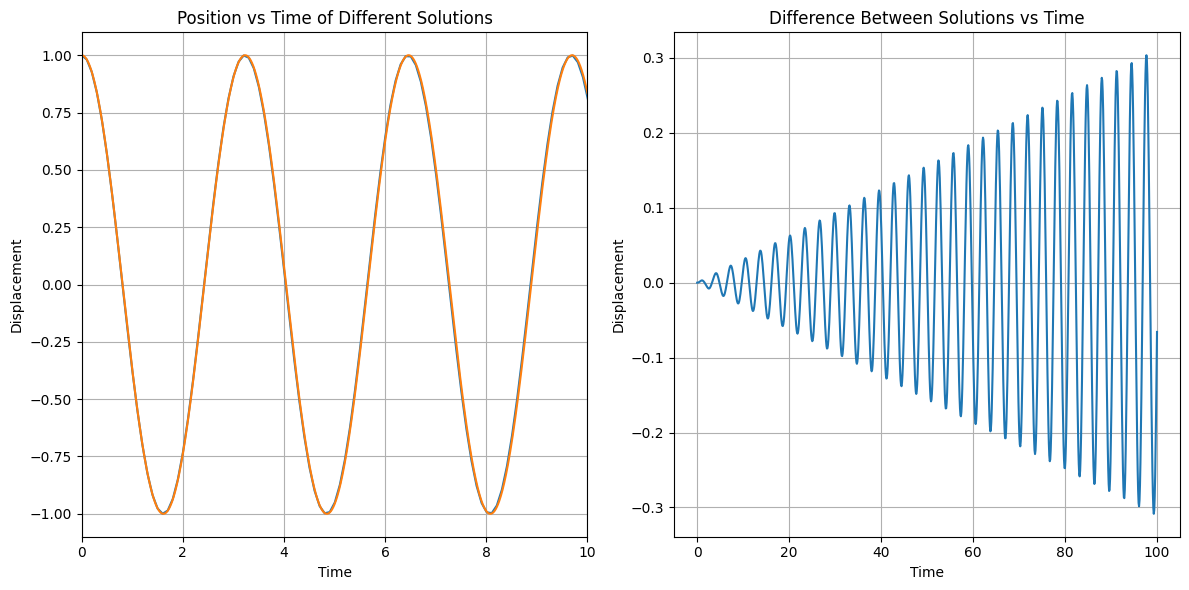

In [18]:
# Parameters
x0 = 1
v0 = 0
x_s = 1.5

def force(x, x_s):
    return -const.g * 2/np.pi * np.arctan(x/x_s)


def numerical_solution(x0, v0, x_s):
    N = 1000
    t = np.linspace(0,100,N) 
    dt = t[1]-t[0]
    
    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = x0
    v[0] = v0

    for i in range (N-1):
       
         v[i+1] = v[i] + 0.5 * dt * force(x[i],x_s)
         x[i+1] = x[i] + dt * v[i+1]
         v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1],x_s)

    return t, x, v

def estimated_analytical_solution(x0, v0, x_s):
    N = 100000
    t = np.linspace(0,100,N)
    dt = t[1]-t[0]

    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = x0
    v[0] = v0

    for i in range (N-1):
       
         v[i+1] = v[i] + 0.5 * dt * force(x[i],x_s)
         x[i+1] = x[i] + dt * v[i+1]
         v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1],x_s)

    return t, x ,v

t_numerical, x_numerical, v_numerical = numerical_solution(x0, v0, x_s)
t_estimate, x_estimate, v_estimate = estimated_analytical_solution(x0, v0, x_s)

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(t_numerical, x_numerical, label = 'Numerical Position')
plt.plot(t_estimate, x_estimate, label = 'Estimated Analytic Position')
plt.xlabel('Time')
plt.xlim(0, 10)
plt.ylabel('Displacement')
plt.title('Position vs Time of Different Solutions')
plt.grid()

from scipy.interpolate import interp1d # Interpolates the data for the estimate as their is a dimensional difference for the time as it uses the different stepsizes.
x_estimate_interp = interp1d(t_estimate, x_estimate)(t_numerical)

plt.subplot(1,2,2)
plt.plot(t_numerical, x_estimate_interp - x_numerical)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Difference Between Solutions vs Time')
plt.grid()

plt.tight_layout()
plt.show()

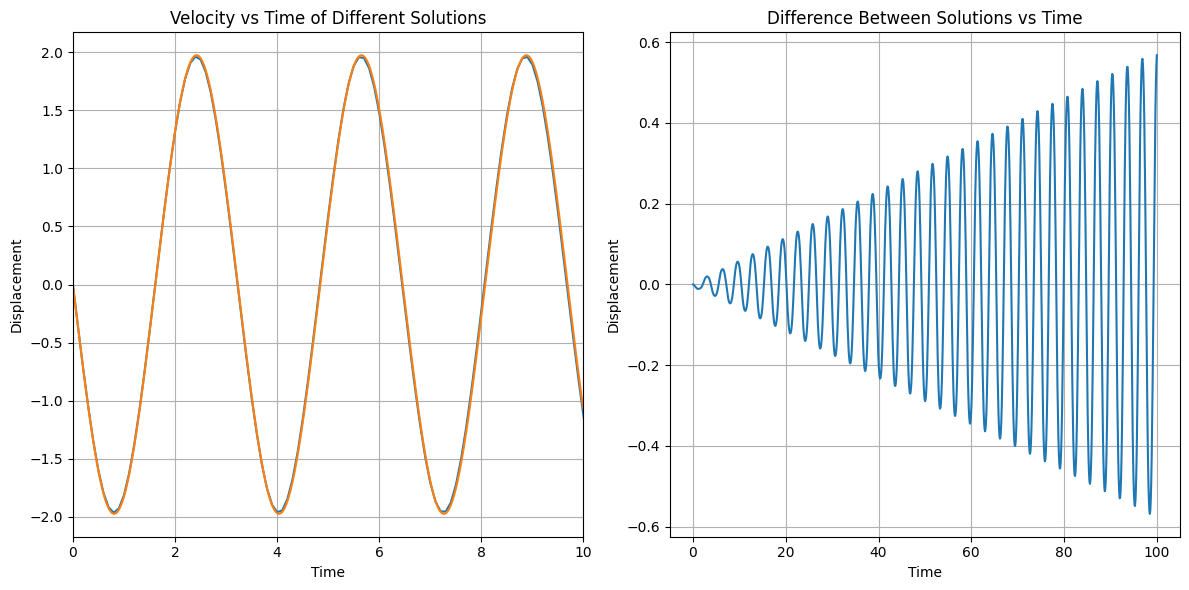

In [19]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(t_numerical, v_numerical, label = 'Numerical Velocity')
plt.plot(t_estimate, v_estimate, label = 'Estimated Analytic Velocity')
plt.xlabel('Time')
plt.xlim(0, 10)
plt.ylabel('Displacement')
plt.title('Velocity vs Time of Different Solutions')
plt.grid()

v_estimate_interp = interp1d(t_estimate, v_estimate)(t_numerical)

plt.subplot(1,2,2)
plt.plot(t_numerical, v_estimate_interp - v_numerical)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Difference Between Solutions vs Time')
plt.grid()

plt.tight_layout()
plt.show()

# Variable Step Size

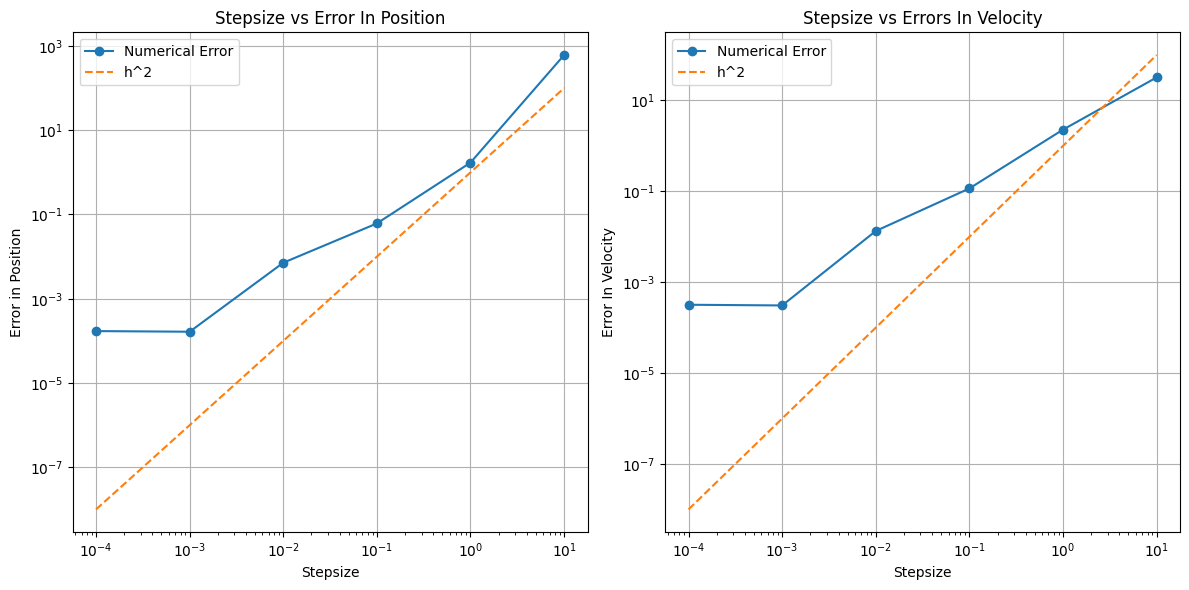

In [21]:
# Parameters
orbits = 10
x0 = 1
v0 = 0
x_s = 1.5
T = 2 * np.pi * np.sqrt(x0/const.g)  # Time per orbit

# Force function
def force(x, x_s):
    return -const.g * 2 / np.pi * np.arctan(x / x_s)

# Numerical solution using Leapfrog Integrator
def numerical_solution(x0, v0, x_s, dt, T, orbits):
    t_final = orbits * T
    h = int(t_final / dt) + 1
    t = np.linspace(0, t_final, h)
    
    x = np.zeros(h)
    v = np.zeros(h)

    x[0] = x0
    v[0] = v0

    for i in range(h-1):
        v[i+1] = v[i] + 0.5 * dt * force(x[i], x_s)
        x[i+1] = x[i] + dt * v[i+1]
        v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1], x_s)

    return t, x, v


def estimated_analytical_solution(x0, v0, x_s, T, orbits):
    dt = 1e-5  #Small Time Step
    t_final = orbits * T
    h = int(t_final / dt) + 1
    t = np.linspace(0, t_final, h)
    
    x = np.zeros(h)
    v = np.zeros(h)

    x[0] = x0
    v[0] = v0

    for i in range(h-1):
        v[i+1] = v[i] + 0.5 * dt * force(x[i], x_s)
        x[i+1] = x[i] + dt * v[i+1]
        v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1], x_s)

    return t, x, v

def calculate_error(stepsizes):
    error_position = []
    error_velocity = []

    t_estimate, x_estimate, v_estimate = estimated_analytical_solution(x0, v0, x_s, T, orbits)
    
    for dt in stepsizes:
        t_numerical, x_numerical, v_numerical = numerical_solution(x0, v0, x_s, dt, T, orbits)
        
        # Interpolate estimated solution
        x_estimate_interp = interp1d(t_estimate, x_estimate)(t_numerical)
        v_estimate_interp = interp1d(t_estimate, v_estimate)(t_numerical)
        
        error_x = np.max(np.abs(x_estimate_interp - x_numerical))
        error_position.append(error_x)

        error_v = np.max(np.abs(v_estimate_interp - v_numerical))
        error_velocity.append(error_v)

    return error_position, error_velocity

# Step Sizes
stepsizes = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
error_position, error_velocity = calculate_error(stepsizes)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(stepsizes, error_position, marker='o', label = 'Numerical Error')
plt.plot(stepsizes, np.array(stepsizes)**2, linestyle = 'dashed', label = 'h^2')
plt.xlabel('Stepsize')
plt.ylabel('Error in Position')
plt.title('Stepsize vs Error In Position')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(stepsizes, error_velocity, marker='o', label = 'Numerical Error')
plt.plot(stepsizes, np.array(stepsizes)**2, linestyle = 'dashed', label = 'h^2')
plt.xlabel('Stepsize')
plt.ylabel('Error In Velocity')
plt.title('Stepsize vs Errors In Velocity')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()

# Using Proper Analytic Solution

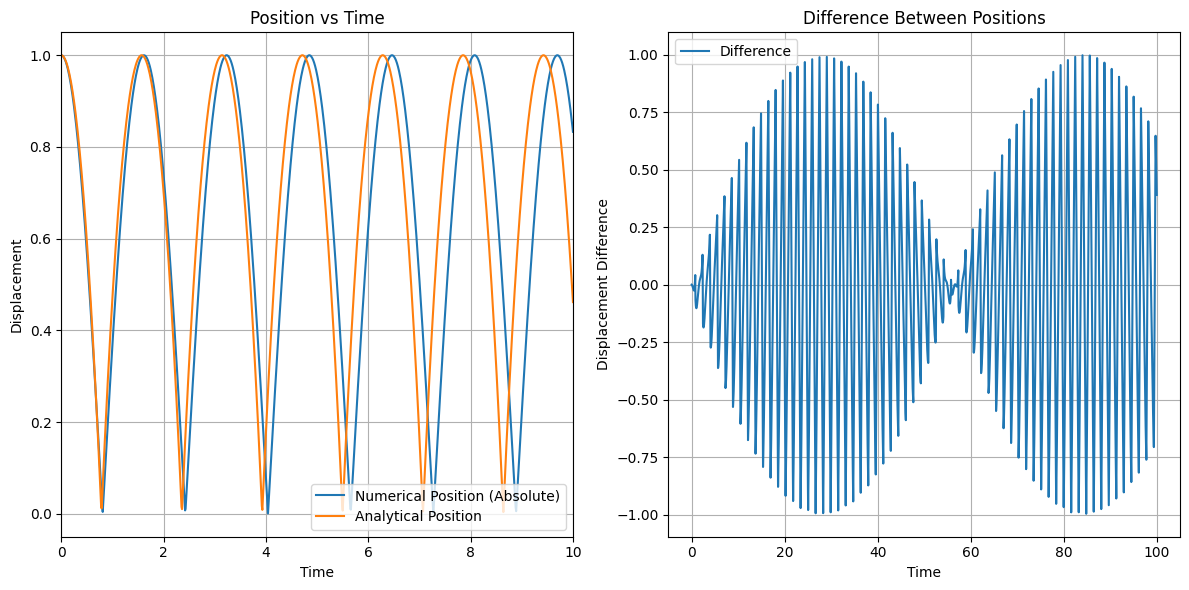

In [61]:
N = 10000
t = np.linspace(0,100,N) 
dt = t[1]-t[0]

x0 = 1
v0 = 0
x_s = 1.5


def analytic(t):
    v = (2 * np.pi - np.arccos(np.cos(2*t))**2)
    x = (2 * np.pi - np.arcsin(np.sin(2*t))**2)
    x = (x - np.min(x)) / (np.max(x) - np.min(x))  # Normalize x
    v = (v - np.min(v)) / (np.max(v) - np.min(v))  # Normalize v
    return x,v

def force(x, x_s):
    return -const.g * 2/np.pi * np.arctan(x/x_s)

def numeric(x0, v0, x_s, dt, N):
    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = x0
    v[0] = v0

    for i in range (N-1):
       
         v[i+1] = v[i] + 0.5 * dt * force(x[i],x_s)
         x[i+1] = x[i] + dt * v[i+1]
         v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1],x_s)

    return x,v

x_numeric, v_numeric = numeric(x0, v0, x_s, dt, N)
x_analytic, v_analytic = analytic(t)

#Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t, np.abs(x_numeric), label='Numerical Position (Absolute)')
plt.plot(t, x_analytic, label='Analytical Position')
plt.xlabel('Time')
plt.xlim(0,10)
plt.ylabel('Displacement')
plt.title('Position vs Time')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t, np.abs(x_numeric) - x_analytic, label='Difference')
plt.xlabel('Time')
plt.ylabel('Displacement Difference')
plt.title('Difference Between Positions')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


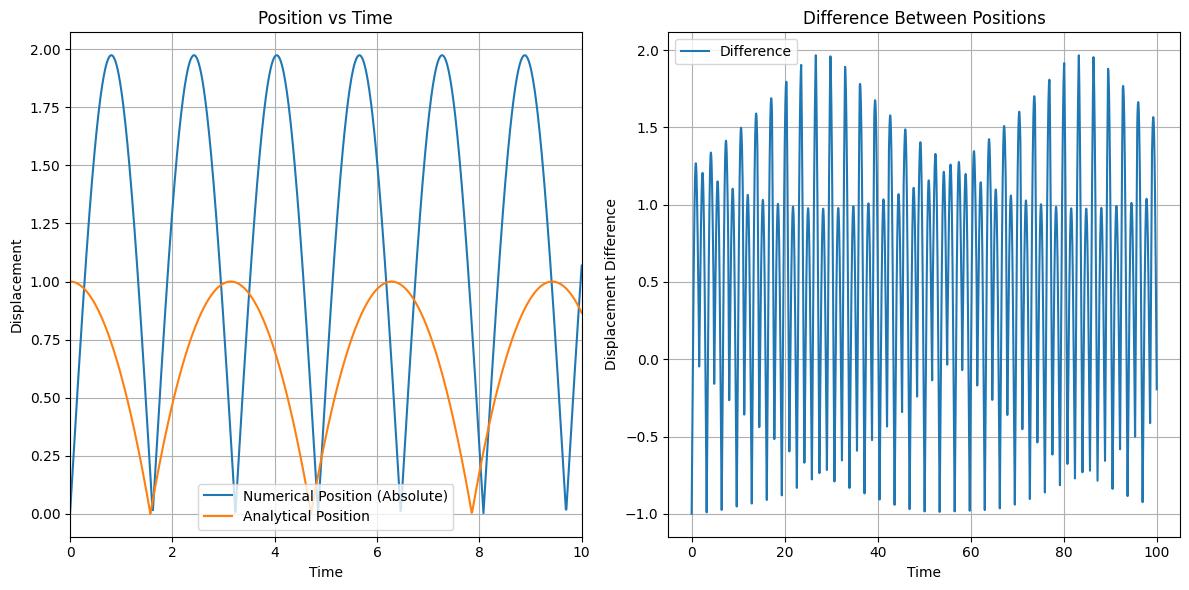

In [50]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t, np.abs(v_numeric), label='Numerical Position (Absolute)')
plt.plot(t, v_analytic, label='Analytical Position')
plt.xlabel('Time')
plt.xlim(0,10)
plt.ylabel('Displacement')
plt.title('Position vs Time')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t, np.abs(v_numeric) - v_analytic, label='Difference')
plt.xlabel('Time')
plt.ylabel('Displacement Difference')
plt.title('Difference Between Positions')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


# Variable Step Size

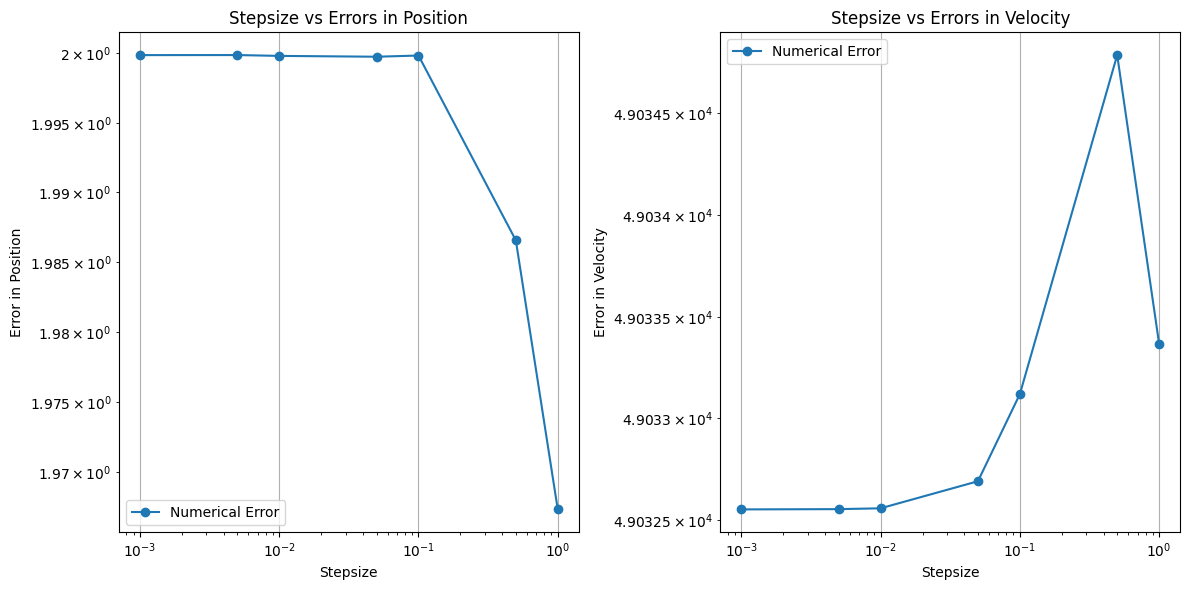

In [40]:
# Parameters
x0 = 1
v0 = 0
x_s = 1.5
t_final = 100

# Analytical solution
def analytic(t):
    v = 0.5 * const.g * t**2
    x = (2 * np.pi - np.arcsin(np.sin(2*t))**2)
    x = (x - np.min(x)) / (np.max(x) - np.min(x))  # Normalize x to [0, 1]
    return x, v

# Force function for the bouncing ball
def force(x, x_s):
    return -const.g * 2/np.pi * np.arctan(x/x_s)

# Numerical solution using Leapfrog Integrator
def numeric(x0, v0, x_s, dt, h):
    x = np.zeros(h)
    v = np.zeros(h)

    x[0] = x0
    v[0] = v0

    for i in range(h-1):
        v[i+1] = v[i] + 0.5 * dt * force(x[i], x_s)
        x[i+1] = x[i] + dt * v[i+1]
        v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1], x_s)

    return x, v

# Step Sizes
stepsizes = [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
errors_position = []
errors_velocity = []

for dt in stepsizes:
    h = int(t_final / dt) + 1
    t = np.linspace(0, t_final, h)
    
    x_analytic, v_analytic = analytic(t)
    x_numeric, v_numeric = numeric(x0, v0, x_s, dt, h)
    
    #Error Calculation
    error_x = np.max(np.abs(x_numeric - x_analytic))
    error_v = np.max(np.abs(v_numeric - v_analytic))
    errors_position.append(error_x)
    errors_velocity.append(error_v)

    # Plot errors vs stepsize on log-log scale
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(stepsizes, errors_position, label = 'Numerical Error', marker = 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Stepsize")
plt.ylabel('Error in Position')
plt.title('Stepsize vs Errors in Position')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(stepsizes, errors_velocity, label = 'Numerical Error', marker = 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Stepsize")
plt.ylabel('Error in Velocity')
plt.title('Stepsize vs Errors in Velocity')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()